In [1]:
import os
os.chdir("./dataset")

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import warnings, fastai
warnings.filterwarnings("ignore")
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [4]:
bs = 64
dir = "training"
fnames = get_image_files(dir)
fnames

[PosixPath('training/cloudy126.jpg'),
 PosixPath('training/rain20.jpg'),
 PosixPath('training/rain34.jpg'),
 PosixPath('training/cloudy132.jpg'),
 PosixPath('training/sunrise33.jpg'),
 PosixPath('training/sunrise27.jpg'),
 PosixPath('training/shine22.jpg'),
 PosixPath('training/shine36.jpg'),
 PosixPath('training/sunrise203.jpg'),
 PosixPath('training/sunrise217.jpg'),
 PosixPath('training/cloudy23.jpg'),
 PosixPath('training/cloudy37.jpg'),
 PosixPath('training/cloudy250.jpg'),
 PosixPath('training/cloudy244.jpg'),
 PosixPath('training/cloudy278.jpg'),
 PosixPath('training/sunrise149.jpg'),
 PosixPath('training/shine128.jpg'),
 PosixPath('training/cloudy293.jpg'),
 PosixPath('training/cloudy287.jpg'),
 PosixPath('training/shine114.jpg'),
 PosixPath('training/sunrise175.jpg'),
 PosixPath('training/sunrise161.jpg'),
 PosixPath('training/shine100.jpg'),
 PosixPath('training/rain2.jpg'),
 PosixPath('training/rain146.jpg'),
 PosixPath('training/rain152.jpg'),
 PosixPath('training/rain185.j

In [7]:
np.random.seed(999)
pat = r'/([\D]+)\d+\.jpg$'

Classes in the dataset:['cloudy', 'rain', 'shine', 'sunrise'] and the count is 4.


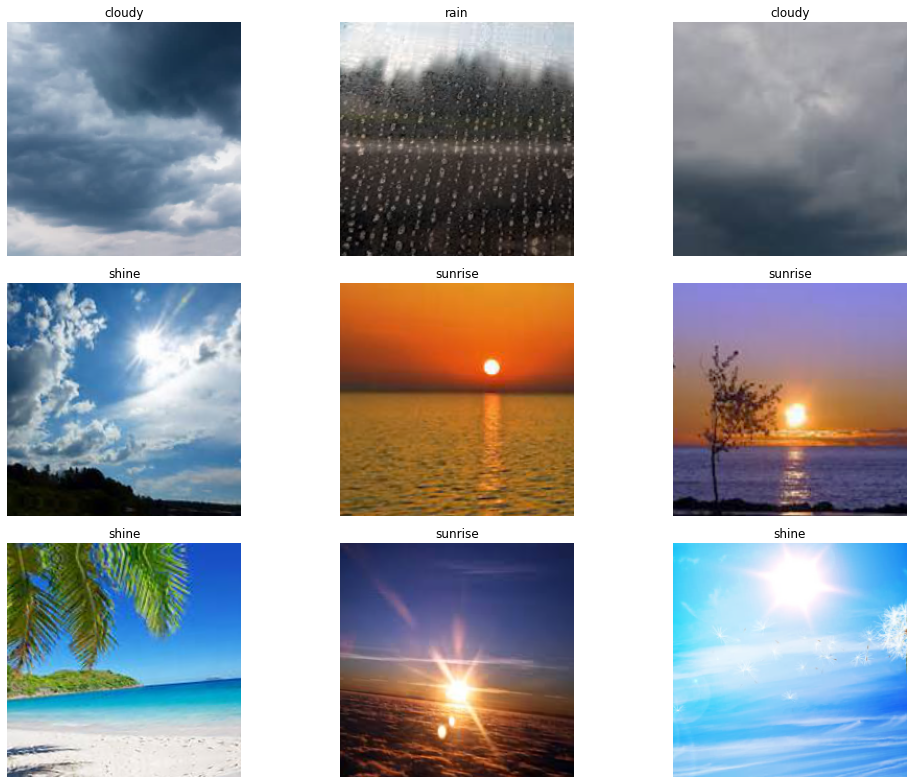

In [8]:
data = ImageDataBunch.from_name_re(dir, fnames, pat, ds_tfms=get_transforms(),
                                   size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows = 3, figsize=(15, 11))
print("Classes in the dataset:{} and the count is {}.".format(data.classes, data.c))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.628233,0.248566,0.080000,0.920000,03:41
1,0.413585,0.119306,0.040000,0.960000,04:02
2,0.303488,0.105104,0.031111,0.968889,03:53
3,0.236835,0.101626,0.031111,0.968889,04:13


In [13]:
#save the model
learn.save('model-1')

In [14]:
#Build a classification interpretation object from the learn model
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

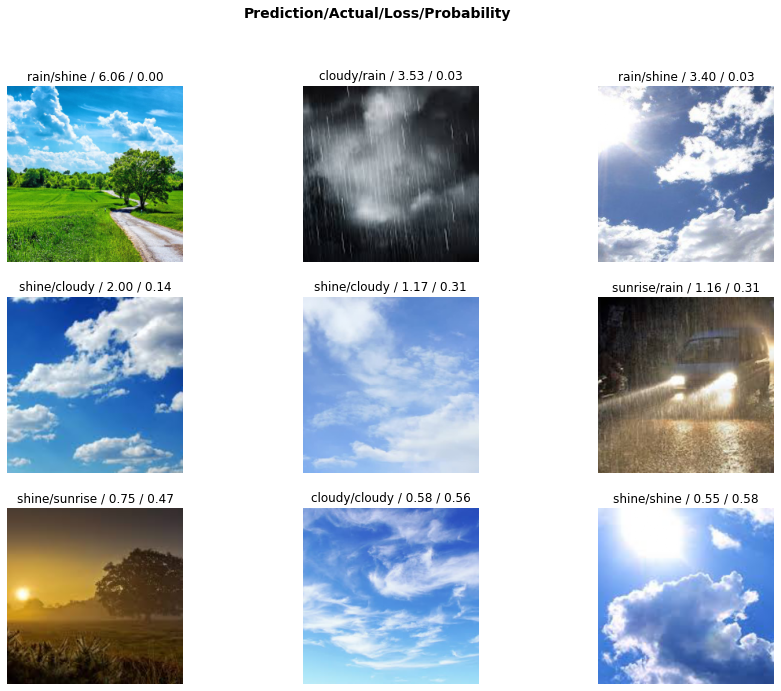

In [15]:
#Show the top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

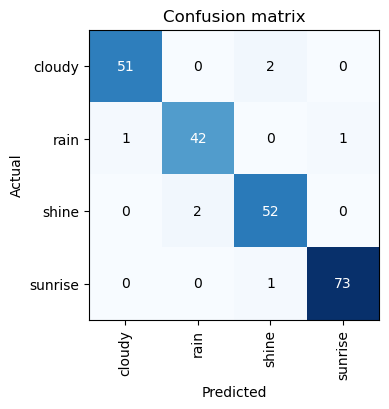

In [16]:
interp.plot_confusion_matrix(dpi=100)

In [17]:
interp.most_confused(min_val=2)

[('cloudy', 'shine', 2), ('shine', 'rain', 2)]

In [18]:
#Unfreeze the other layers to train the network on the target data
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.226446,0.354388,0.075556,0.924444,05:00


In [19]:
learn.load('model-1')

Learner(data=ImageDataBunch;

Train: LabelList (900 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rain,rain,cloudy,sunrise,sunrise
Path: training;

Valid: LabelList (225 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunrise,cloudy,cloudy,sunrise,rain
Path: training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-05
Min loss divided by 10: 6.92E-05


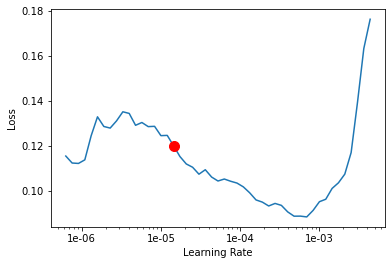

In [20]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [21]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.163423,0.255726,0.062222,0.937778,06:04
1,0.169743,0.142818,0.035556,0.964444,05:24
2,0.127115,0.060232,0.022222,0.977778,05:50
3,0.096728,0.042609,0.008889,0.991111,05:12


In [22]:
learn.save('model-1-50')

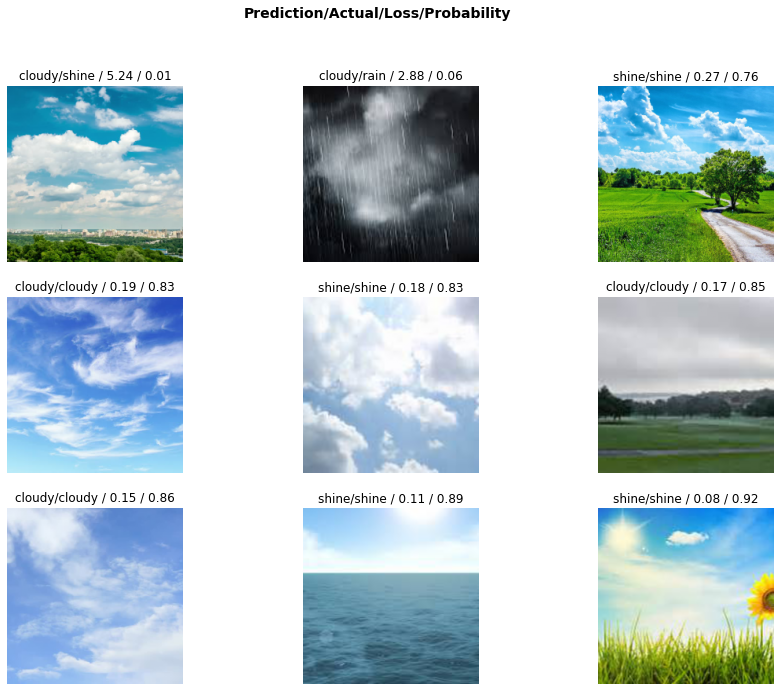

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

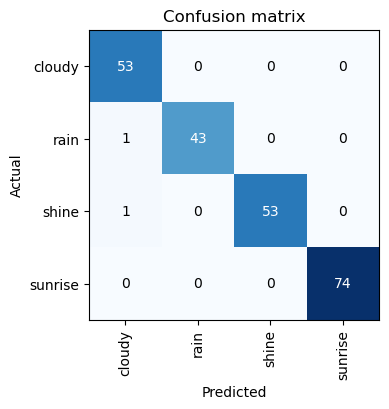

In [24]:
interp.plot_confusion_matrix(dpi=100)

In [25]:
learn.load('model-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (900 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rain,rain,cloudy,sunrise,sunrise
Path: training;

Valid: LabelList (225 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunrise,cloudy,cloudy,sunrise,rain
Path: training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

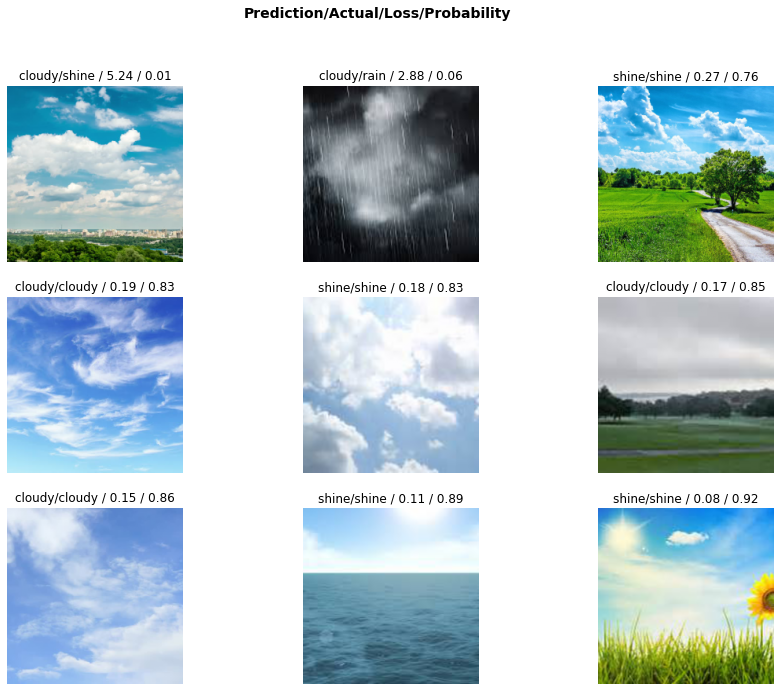

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

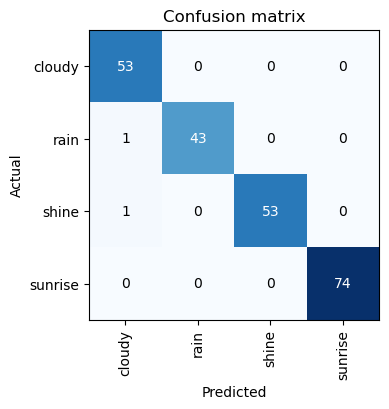

In [27]:
interp.plot_confusion_matrix(dpi=100)

In [102]:
#Export the trained model for Web app usage.
learn.export()

In [103]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

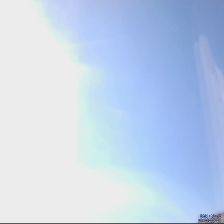

In [95]:
learn.load('model-1-50')
test_img = open_image("sample.jpg").resize(224)
test_img

In [96]:
learn.predict(test_img)[0]

Category tensor(2)

In [91]:
weather_condition = learn.predict(test_img)[0]
weather_condition

Category tensor(2)

In [101]:
print(learn.predict(test_img)[0])

shine


In [100]:
text = []
text.append(learn.predict(test_img)[0])
text

[Category tensor(2)]